**问题：**
假设你正在为一个电影推荐系统设计一个简单的KNN算法。我们有以下一些用户的电影评分数据，数据由两个特征组成：用户对电影A和电影B的评分，分别在1-5之间。用户的标签（电影类型偏好）是动作片（标签0）或者是喜剧片（标签1）。我们有一个新用户，他给电影A评分为3，电影B评分为4。请问这个用户可能偏好哪种类型的电影？

**数据：**

| 用户   | 电影A评分 | 电影B评分 | 偏好类型 |
| ------ | --------- | --------- | -------- |
| 用户1  | 5         | 1         | 动作片   |
| 用户2  | 4         | 2         | 动作片   |
| 用户3  | 2         | 5         | 喜剧片   |
| 用户4  | 1         | 4         | 喜剧片   |
| 用户5  | 3         | 2         | 动作片   |
| 用户6  | 2         | 5         | 喜剧片   |

你需要做以下步骤：
1. 构造数据
2. 创建KNN模型
3. 使用数据训练模型
4. 预测新用户的喜好

# 0. 引入核心包

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 1. X, y

In [ ]:
X =X = np.array([[5, 1],
              [4, 2],
              [2, 5],
              [1, 4],
              [3, 2],
              [2, 5]])

y =  np.array([0, 0, 1, 1, 0, 1]) # 0表示动作片，1表示喜剧片

# 2. 创建 KNN 模型
k = 1

In [ ]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

# 3. 训练模型

In [ ]:
knn.fit(X, y)

# 4. 用模型推理(预测)用户的喜好

In [ ]:
new_user = np.array([[3, 4]])
prediction = knn.predict(new_user)


# 5. 数据可视化

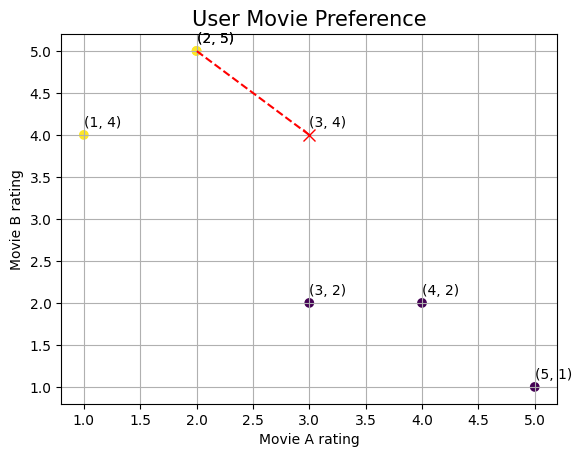

In [2]:
plt.title("User Movie Preference", size=15) 
plt.xlabel("Movie A rating")
plt.ylabel("Movie B rating")
plt.grid()

plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Action')# 绘制原始样本点，要求不同的影片喜好类别用不同的颜色标记
plt.scatter(X[y==1, 0], X[y==1, 1], c='orange', label='Comedy')# 提示: 用scatter散点图绘制，用它的参数c实现不同的类别用不同的颜色标记
plt.plot(new_user[0, 0], new_user[0, 1], marker='x', markersize=8, color='red')
# 绘制新数据点，用红色x标记，大小为8
# 提示：用plt.plot()绘制，用它的参数marker实现不同的标记符号
dist, idx = knn.kneighbors(new_user)
# 新数据最近邻索引为第一个最近邻的索引
nearest = X[idx[0], :] # 获取最近邻点的坐标，这是一个列表，第一个元素是x坐标，第二个元素是y坐标

# 用红线标记新数据点与最近邻点的连接线
# 提示：用plt.plot()绘制，用 r-- 实现红色虚线
plt.plot([new_user[0, 0], nearest[0, 0]], [new_user[0, 1], nearest[0, 1]], 'r--')
# 为每个点添加坐标文本  
for x, y in zip(X[:, 0], X[:, 1]):
    plt.text(x, y+0.1, f'({x}, {y})') 

# 为新数据点添加坐标文本
plt.text(new_user[0,0], new_user[0,1]+0.1, f'({new_user[0,0]}, {new_user[0,1]})')
plt.show()